In [1]:
import tensorflow as tf
from tensorflow.keras import datasets,layers,models
import matplotlib.pyplot as plt
import numpy as np

In [2]:
(X_train,y_train),(X_test,y_test) = datasets.cifar10.load_data()

In [3]:
X_train.shape

(50000, 32, 32, 3)

In [4]:
X_test.shape

(10000, 32, 32, 3)

In [5]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [6]:
#if you want to flatten the array you have to write -1 for no change in the first dimension and keep blank for flateen it will generate automatically
y_train = y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [7]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [8]:
def plot_sample(X,y,index):
    #plt.figure(figsize=(15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

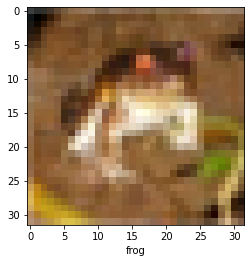

In [9]:
plot_sample(X_train,y_train,0)

In [10]:
X_train = X_train/255
X_test = X_test/255

In [11]:
ann = models.Sequential([
    layers.Flatten(input_shape=(32,32,3)),
    layers.Dense(3000,activation='relu'),
    layers.Dense(1000,activation='relu'),
    layers.Dense(10,activation='sigmoid')
])

ann.compile(optimizer='SGD',
            #we use spase categorical crossentropy when we give the value of y directly if the value of the y is one hot level encoded then we use categorical crossentropy
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy']
)


ann.fit(X_train,y_train,epochs=5)

Epoch 1/5
1563/1563 [==============================] - 15s 9ms/step - loss: 1.8113 - accuracy: 0.3554
Epoch 2/5
1563/1563 [==============================] - 14s 9ms/step - loss: 1.6226 - accuracy: 0.4267
Epoch 3/5
1563/1563 [==============================] - 14s 9ms/step - loss: 1.5435 - accuracy: 0.4552
Epoch 4/5
1563/1563 [==============================] - 14s 9ms/step - loss: 1.4832 - accuracy: 0.4766
Epoch 5/5
1563/1563 [==============================] - 14s 9ms/step - loss: 1.4327 - accuracy: 0.4976


In [12]:
ann.evaluate(X_test,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 1.4770 - accuracy: 0.4741


[1.4770435094833374, 0.4740999937057495]

In [13]:

cnn = models.Sequential([

        #cnn
        #we have to give the filter size and the how many filter you want
        layers.Conv2D(filters=32, kernel_size=(3,3), activation = 'relu',input_shape = (32,32,3)),
        layers.MaxPooling2D((2,2)),
        #just for fun another convolution ,relu and maxpooling layer
        layers.Conv2D(filters=32, kernel_size=(3,3), activation = 'relu',input_shape = (32,32,3)),
        layers.MaxPooling2D((2,2)),

        #dense
        layers.Flatten(),
        layers.Dense(64,activation='relu'),
        layers.Dense(10,activation='softmax')
        ])

cnn.compile(optimizer='adam',
        #we use spase categorical crossentropy when we give the value of y directly if the value of the y is one hot level encoded then we use categorical crossentropy
        loss = 'sparse_categorical_crossentropy',
        metrics = ['accuracy']
)

In [14]:
with tf.device('/CPU:0'):
    cnn.fit(X_train,y_train,epochs=10)
    cnn.evaluate(X_test,y_test)

Epoch 1/10
1563/1563 [==============================] - 18s 11ms/step - loss: 1.4835 - accuracy: 0.4673
Epoch 2/10
1563/1563 [==============================] - 20s 13ms/step - loss: 1.1518 - accuracy: 0.5954
Epoch 3/10
1563/1563 [==============================] - 21s 13ms/step - loss: 1.0377 - accuracy: 0.6371
Epoch 4/10
1563/1563 [==============================] - 20s 13ms/step - loss: 0.9636 - accuracy: 0.6616
Epoch 5/10
1563/1563 [==============================] - 20s 13ms/step - loss: 0.9033 - accuracy: 0.6823
Epoch 6/10
1563/1563 [==============================] - 20s 13ms/step - loss: 0.8538 - accuracy: 0.7009
Epoch 7/10
1563/1563 [==============================] - 20s 13ms/step - loss: 0.8115 - accuracy: 0.7179
Epoch 8/10
1563/1563 [==============================] - 20s 13ms/step - loss: 0.7729 - accuracy: 0.7294
Epoch 9/10
1563/1563 [==============================] - 20s 13ms/step - loss: 0.7378 - accuracy: 0.7443
Epoch 10/10
313/313 [==============================] - 2s 5ms/st